In [1]:
# from sklearn.model_selection import RandomizedSearchCV

In [8]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#data preprocessing step


In [11]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [12]:
col_names  = ['buying', 'maint', 'doors','persons','lug_boot','safety','class']

In [14]:
df.columns = col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [19]:
df.describe(include="all").T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [21]:
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [23]:
df[df.duplicated()]


,buying,maint,doors,persons,lug_boot,safety,class


In [24]:
# convert data to  numerical data


In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df['buying']= oe.fit_transform(df[['buying']])
df['maint']= oe.fit_transform(df[['maint']])
df['doors']= oe.fit_transform(df[['doors']])
df['persons']= oe.fit_transform(df[['persons']])
df['lug_boot']= oe.fit_transform(df[['lug_boot']])
df['safety']= oe.fit_transform(df[['safety']])
df['class']= oe.fit_transform(df[['class']])

In [31]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [38]:
#output vectors
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf1 =RandomForestClassifier()
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
pred1=clf1.predict(X_test)
pred1

array([0., 2., 2., 2., 2., 3., 2., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2.,
       2., 0., 2., 2., 2., 3., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 0., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0., 2., 0.,
       0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 3., 2., 2., 2., 2.,
       2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 3., 2., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 3., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1,y_test))

0.9653179190751445


In [53]:
RandomForestClassifier()

RandomForestClassifier()

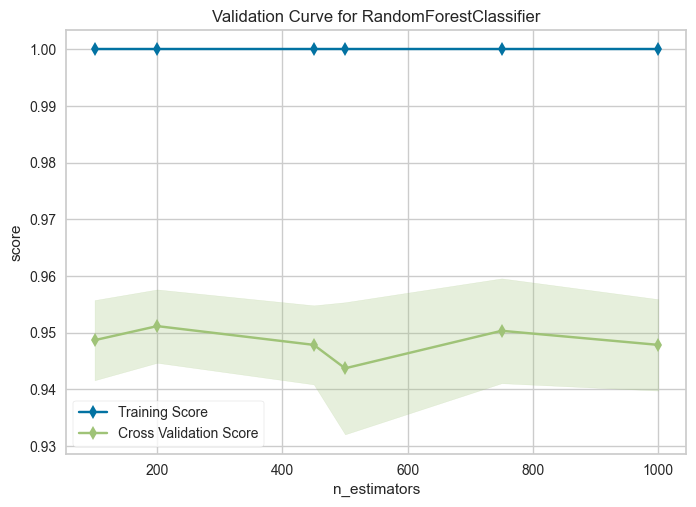

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [60]:
#on basis of accuracy Score

from yellowbrick.model_selection import validation_curve

num_est = [ 100,200,450,500,750,1000]

print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name= 'n_estimators',param_range=num_est,scoring='accuracy',cv=3))

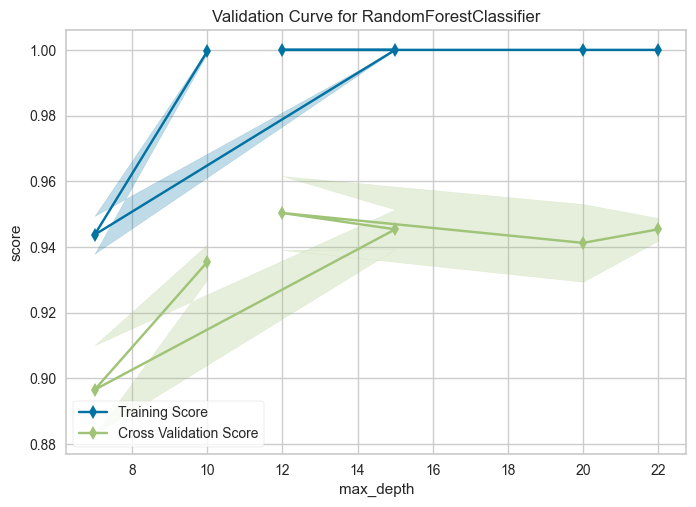

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [61]:
#On basis of max_depth parameter
from yellowbrick.model_selection import validation_curve


depth_vals= [10,7,15,12,20,22]

print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name= 'max_depth',param_range=depth_vals,scoring='accuracy',cv=3))

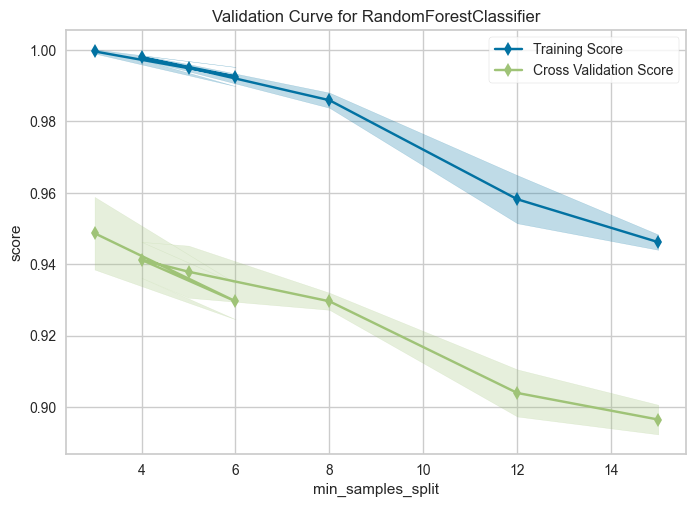

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [64]:
#on basis of min_samples_split
min_samples = [3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name= 'min_samples_split',param_range=min_samples,scoring='accuracy',cv=3))

In [79]:
#creating a new classifier based on Data visualization Parameter ,on basis of best values of each paramter

clf2= RandomForestClassifier(n_estimators=200,min_samples_split=3,max_depth=12,random_state=0)
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)
print(accuracy_score(pred2,y_test))

0.9653179190751445


In [67]:
#important feature from dataset using Randomforest

In [81]:
#Extracting best features on basis of score using  feature_importances_ class

feature_scores=pd.Series(clf2.feature_importances_,index=X_train.columns).sort_values(ascending=True)
print(feature_scores)

doors       0.069405
lug_boot    0.085044
maint       0.141258
buying      0.177451
persons     0.238442
safety      0.288400
dtype: float64


Text(0.5, 0, 'feature_scores')

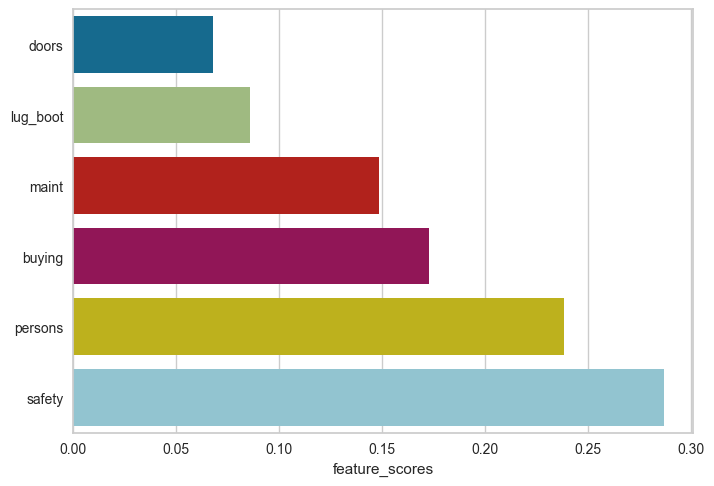

In [74]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('feature_scores')


In [107]:
#Creating a new classsifer on basis on best Feature we get to contruct best model for data frame
clf3= RandomForestClassifier()

Xn=df[['buying','persons','safety']]
yn=df['class']

X_trainn,X_testn,y_trainn,y_testn= train_test_split(Xn,yn,test_size=0.3,random_state=0)
clf3.fit(X_trainn,y_trainn)

pred3= clf3.predict(X_testn)


In [108]:
accuracy_score(pred3,y_testn)

0.8092485549132948

In [121]:
df3= df.drop(['doors','lug_boot','maint'],axis=1)
df3.sample(6)

,buying,persons,safety,class
1589,1.0,2.0,1.0,2.0
552,0.0,1.0,2.0,2.0
469,0.0,1.0,0.0,2.0
890,2.0,0.0,1.0,2.0
1683,1.0,1.0,2.0,0.0
328,3.0,0.0,0.0,2.0


In [122]:

buying=eval(input("enter buying"))

persons= eval(input("enter number of perosn"))
safety= eval(input("enter safety rating"))

query = {'buying': [buying], 'persons': [persons], 'safety': [safety]}
query = pd.DataFrame(query,columns=['buying', 'persons', 'safety'])
pred4= clf3.predict(query)
print(pred4[0])


2.0


In [90]:
clf3.feature_names_in_

array(['buying', 'persons', 'safety', 'class'], dtype=object)

In [113]:
type(eval(input("enter number")))

int